In [8]:
import pandas as pd

In [9]:
road = pd.read_csv("서울특별시 월별 교통량 정보.csv",  encoding='utf-8', header=0)

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6,7,8,9,11,13,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287086 entries, 0 to 287085
Data columns (total 30 columns):
일자      287086 non-null int64
요일      287086 non-null object
지점명     287086 non-null object
지점번호    287086 non-null object
구분      287086 non-null object
방향      286780 non-null object
0시      231172 non-null object
1시      231188 non-null object
2시      231044 non-null object
3시      231296 non-null object
4시      231649 non-null float64
5시      231503 non-null object
6시      230402 non-null float64
7시      230022 non-null object
8시      229802 non-null float64
9시      229850 non-null float64
10시     230141 non-null float64
11시     230583 non-null object
12시     230685 non-null object
13시     230965 non-null object
14시     231098 non-null object
15시     231379 non-null object
16시     231604 non-null object
17시     231760 non-null object
18시     231890 non-null object
19시     231943 non-null object
20시     231708 non-null object
21시     231542 non-null object
22시     231037 no

In [11]:
road.shape

(287086, 30)

In [12]:
import missingno as mino

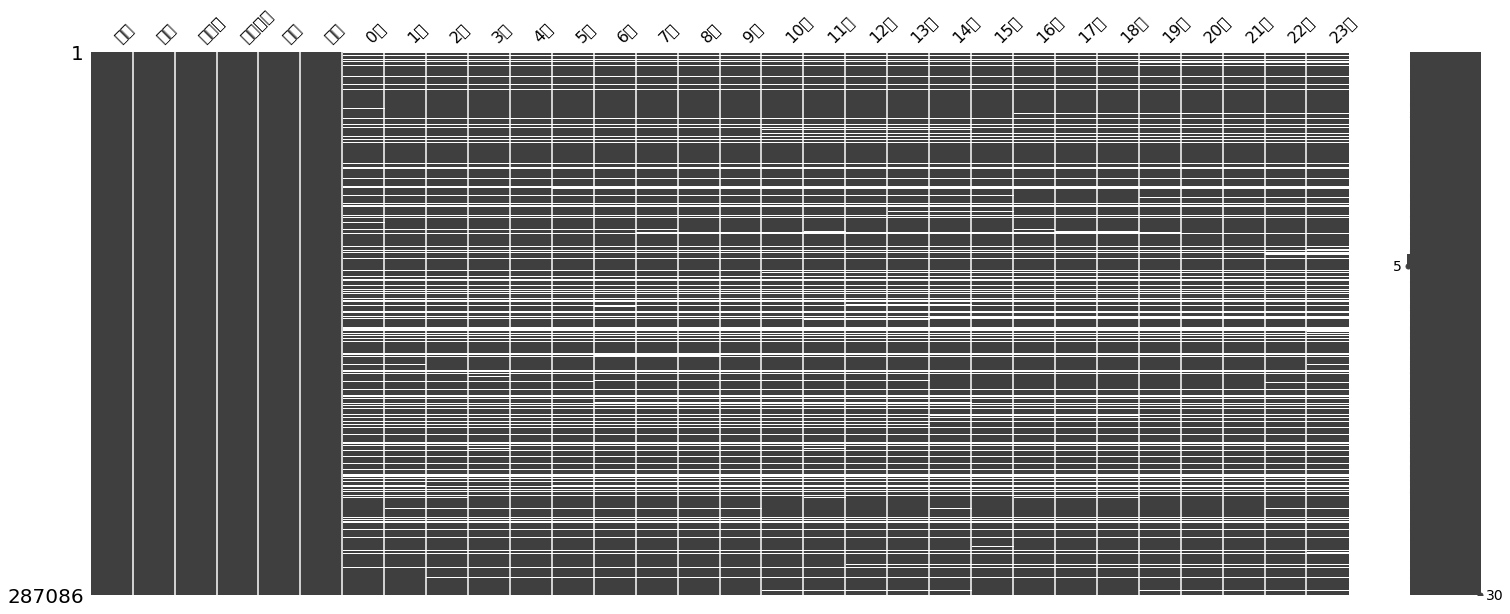

In [13]:
mino.matrix(road)

In [7]:
road.head()

,일자,요일,지점명,지점번호,구분,방향,0시,1시,2시,3시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,20180331,토,서부간선도로,F-09,유출,목동교->신정교,3342,2846,2175,1743,...,3128,3064,2897,2921,3027,2788,2900,2990,2962,3185
1,20180331,토,서부간선도로,F-09,유입,신정교->목동교,2454,2161,1570,1274,...,2275,2339,2339,2386,2504,2432,2326,2433,2474,2498
2,20180331,토,노들로,F-08,유출,여의2교->여의하류IC(노들로),950,748,585,537,...,2213,2210,2290,2340,2211,1567,1669,1537,1345,1005
3,20180331,토,노들로,F-08,유입,여의하류IC->여의2교(노들로),795,705,628,572,...,1486,1473,1219,1337,1087,983,915,996,974,823
4,20180331,토,분당수서로,F-07,유출,탄천IC진입(동부간선도로)->수서IC(동부간선도로),2276,1636,1218,1052,...,3425,3049,3827,3785,3682,3447,3470,3583,3340,2646


In [39]:
data = road.melt(road.columns[:6], var_name='시',value_name='수')

In [40]:
data.head()

,일자,요일,지점명,지점번호,구분,방향,시,수
0,20180331,토,서부간선도로,F-09,유출,목동교->신정교,0시,3342
1,20180331,토,서부간선도로,F-09,유입,신정교->목동교,0시,2454
2,20180331,토,노들로,F-08,유출,여의2교->여의하류IC(노들로),0시,950
3,20180331,토,노들로,F-08,유입,여의하류IC->여의2교(노들로),0시,795
4,20180331,토,분당수서로,F-07,유출,탄천IC진입(동부간선도로)->수서IC(동부간선도로),0시,2276


In [12]:
data.isna().any()

일자      False
요일      False
지점명     False
지점번호    False
구분      False
방향       True
시       False
수        True
dtype: bool

In [21]:
data.수 = data.수.fillna(0)

In [29]:
data.수.replace('-','',inplace=True)
data.수.replace('',NaN,inplace=True)

NameError: name 'NaN' is not defined

In [43]:
import numpy as np
import re

In [41]:
data.replace(to_replace=[None], value=np.nan)

,일자,요일,지점명,지점번호,구분,방향,시,수
0,20180331,토,서부간선도로,F-09,유출,목동교->신정교,0시,3342
1,20180331,토,서부간선도로,F-09,유입,신정교->목동교,0시,2454
2,20180331,토,노들로,F-08,유출,여의2교->여의하류IC(노들로),0시,950
3,20180331,토,노들로,F-08,유입,여의하류IC->여의2교(노들로),0시,795
4,20180331,토,분당수서로,F-07,유출,탄천IC진입(동부간선도로)->수서IC(동부간선도로),0시,2276
5,20180331,토,분당수서로,F-07,유입,수서IC(동부간선도로)->탄천IC진입(동부간선도로),0시,1867
6,20180331,토,경부고속도로,F-06,유출,반포IC -> 서초IC,0시,4064
7,20180331,토,경부고속도로,F-06,유입,서초IC -> 반포IC,0시,2936
8,20180331,토,동부간선도로,F-05,유출,군자교->장안교,0시,3709
9,20180331,토,동부간선도로,F-05,유입,장안교->군자교,0시,2133


In [27]:
data['수'] = data['수'].astype('int')

ValueError: invalid literal for int() with base 10: ''